In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.shape

(1025, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
model=pickle.load(open('model.pkl','rb'))
sc=pickle.load(open('scalar.pkl','rb'))

In [7]:
type(model)

sklearn.ensemble._forest.RandomForestClassifier

In [8]:
type(sc)

sklearn.preprocessing._data.MinMaxScaler

In [12]:
X=df.iloc[:,:13]
y=df['target']

In [13]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [17]:
X_sc=sc.transform(X)

In [18]:
y_pred=model.predict(X_sc)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [19]:
print(accuracy_score(y_pred,y))

0.9297560975609757


In [20]:
print(confusion_matrix(y_pred,y))

[[445  18]
 [ 54 508]]


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(95.72222222222221, 0.5, 'Actual Value')

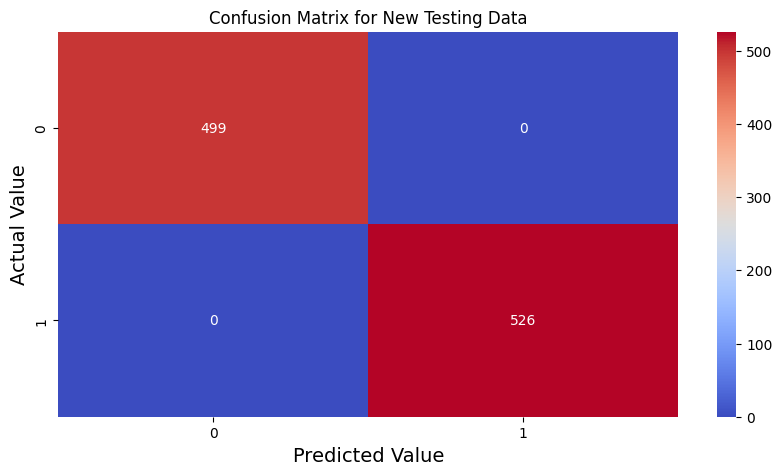

In [34]:
cm1 = confusion_matrix(y,ypred1)

plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for New Testing Data', fontsize=12)
sns.heatmap(cm1, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)

In [26]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [29]:
model.fit(X_sc,y)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [30]:
ypred1=model.predict(X_sc)

In [32]:
print(accuracy_score(ypred1,y))

1.0


In [35]:
from imblearn.over_sampling import SMOTE

TypeError: BaseSampler.fit_resample() missing 1 required positional argument: 'y'

In [42]:
df2=pd.read_csv('heart_disease_data.csv')

In [49]:
df2.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [51]:
X=df2.iloc[:,:13]
y=df2['target']

In [52]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [47]:
y.shape

(303,)

In [53]:
X_sc=sc.transform(X)

In [54]:
pred=model.predict(X_sc)

Text(95.72222222222221, 0.5, 'Actual Value')

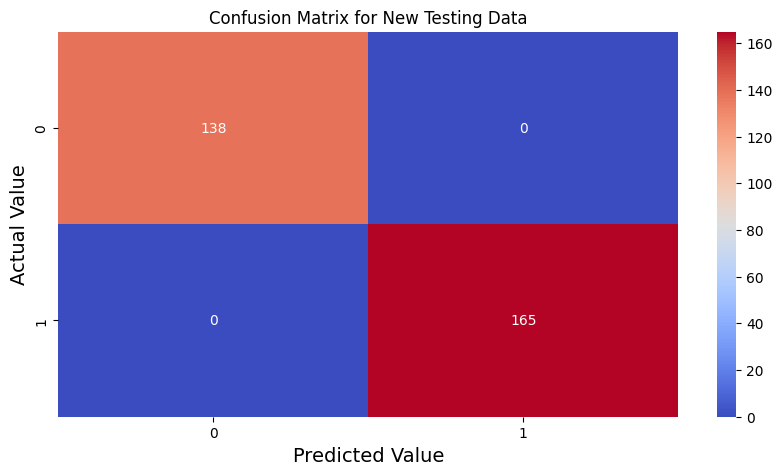

In [55]:
cm1 = confusion_matrix(y,pred)

plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for New Testing Data', fontsize=12)
sns.heatmap(cm1, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)

In [57]:
data=pd.concat([df,df2])

In [59]:
data.shape

(1328, 14)

In [61]:
data.duplicated().sum()

1026

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X=df.iloc[:,:13]
y=df['target']

In [65]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [67]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [69]:
pred=model.predict(X_test)

In [72]:
trainpred=model.predict(X_train)
print(accuracy_score(trainpred,y_train))

0.9878048780487805


In [70]:
print(accuracy_score(y_test,pred))

0.9317073170731708


Text(95.72222222222221, 0.5, 'Actual Value')

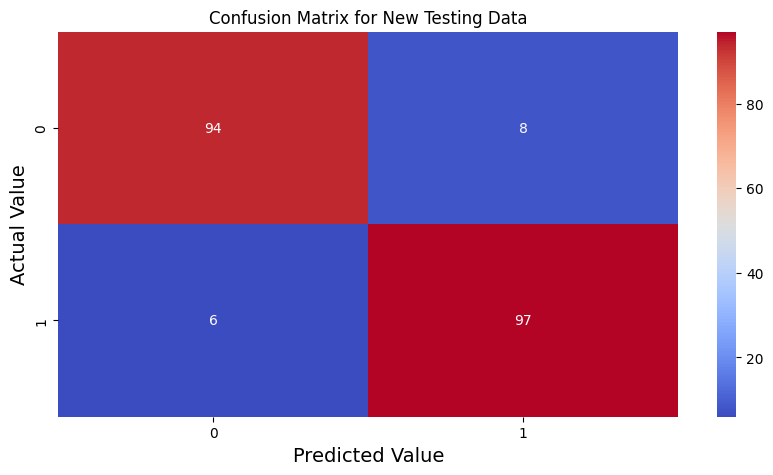

In [71]:
cm1 = confusion_matrix(y_test,pred)

plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for New Testing Data', fontsize=12)
sns.heatmap(cm1, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn


In [76]:
# Define the model
rf = model

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [77]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\djdeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
404 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\djdeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\djdeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\djdeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                              min_samples_split=10,
                                              n_estimators=200),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [78]:
# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best estimator
best_rf = grid_search.best_estimator_

# Predict on test set
y_pred = best_rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: {:.2f}%".format(accuracy * 100))

Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy on test set: 98.54%


In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
best_rf=RandomForestClassifier(n_estimators=50,max_depth=20,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,random_state=42)

In [81]:
best_rf.fit(X,y)

RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42)

In [86]:
pred=best_rf.predict(X)

Text(95.72222222222221, 0.5, 'Actual Value')

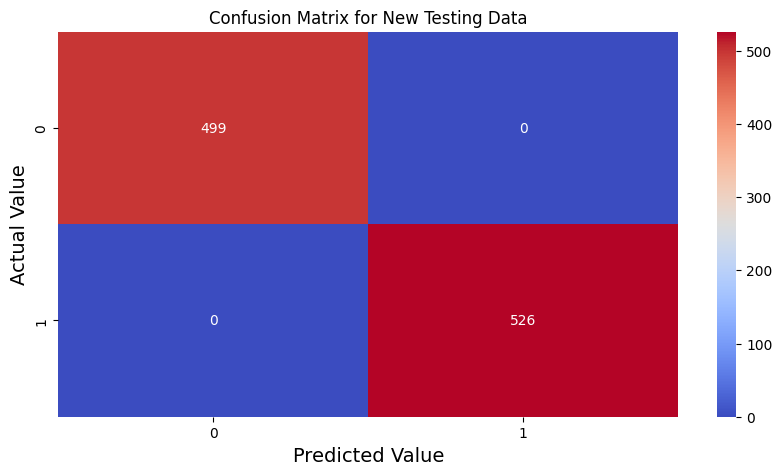

In [87]:
cm1 = confusion_matrix(y,pred)

plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for New Testing Data', fontsize=12)
sns.heatmap(cm1, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)

In [90]:
smote=SMOTE()
X_res,y_res=smote.fit_resample(X,y)

In [91]:
X_res.shape

(1052, 13)

In [92]:
y_res.shape

(1052,)

In [93]:
pred_res=best_rf.predict(X_res)

Text(95.72222222222221, 0.5, 'Actual Value')

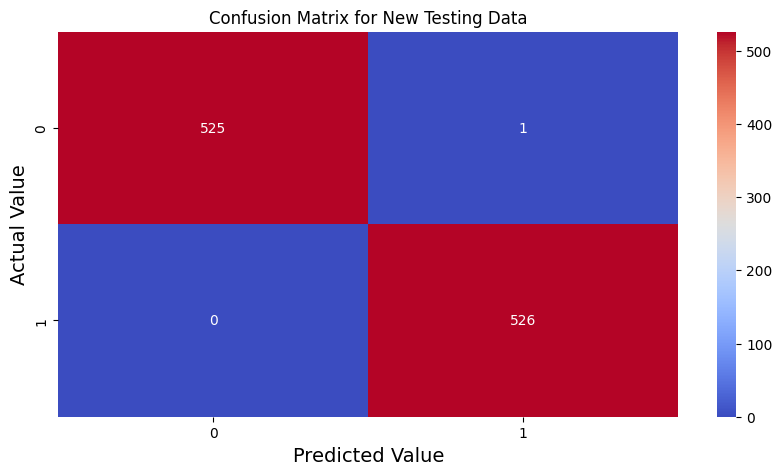

In [94]:
cm1 = confusion_matrix(y_res,pred_res)

plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for New Testing Data', fontsize=12)
sns.heatmap(cm1, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)

In [95]:
pickle.dump(best_rf,open('BestRfModel.pkl','wb'))